In [0]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [0]:
mnist = load_digits()

###С использованием метода train_test_split разделите выборку на обучающую и тестовую.

In [0]:
mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(
    mnist.data, mnist.target, test_size=0.33, random_state = 1)

###Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью трех подходящих для задачи метрик.

In [0]:
cl1_1 = KNeighborsClassifier(n_neighbors=70)
cl1_1.fit(mnist_X_train, mnist_y_train)
target1_0 = cl1_1.predict (mnist_X_train)
target1_1 = cl1_1.predict (mnist_X_test)
accuracy_score(mnist_y_train, target1_0) , accuracy_score(mnist_y_test, target1_1)

(0.9301745635910225, 0.9292929292929293)

In [0]:
cl1_2 = KNeighborsClassifier(n_neighbors=3)  # МЕТРИКА ACCURACY
cl1_2.fit(mnist_X_train, mnist_y_train)
target1_0 = cl1_2.predict (mnist_X_train)
target1_1 = cl1_2.predict (mnist_X_test)
accuracy_score(mnist_y_train, target1_0) , accuracy_score(mnist_y_test, target1_1)

(0.9900249376558603, 0.9831649831649831)

In [0]:
# МЕТРИКА PRECISION (точность)
precision_score(mnist_y_train, target1_0, average='macro') , precision_score(
    mnist_y_test, target1_1,average = 'macro' )

(0.9899136505953144, 0.9828048177163854)

In [0]:
# МЕТРИКА PRECISION 
recall_score(mnist_y_train, target1_0, average='macro') , recall_score(
    mnist_y_test, target1_1,average = 'macro' )


(0.9899580463051775, 0.983269550229678)

In [0]:
cl1_3 = KNeighborsClassifier(n_neighbors=1)
cl1_3.fit(mnist_X_train, mnist_y_train)
target1_0 = cl1_3.predict (mnist_X_train)
target1_1 = cl1_3.predict (mnist_X_test)
accuracy_score(mnist_y_train, target1_0) , accuracy_score(mnist_y_test, target1_1)

(1.0, 0.9882154882154882)

###Постройте модель и оцените качество модели с использованием кросс-валидации. Проведите эксперименты с тремя различными стратегиями кросс-валидации.




In [0]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), 
                         mnist.data, mnist.target, cv=8)
scores

array([0.94666667, 0.98222222, 0.95111111, 0.97333333, 0.96888889,
       0.99107143, 0.99107143, 0.94642857])

In [0]:
np.mean(scores)

0.9688492063492063

In [0]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), 
                         mnist.data, mnist.target, cv=8,
                        scoring='f1_weighted')
scores, np.mean(scores)

(array([0.94768494, 0.98200127, 0.95147097, 0.97320885, 0.96933259,
        0.99106932, 0.9910649 , 0.94565207]), 0.9689356120000322)

In [0]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

scores = cross_validate(KNeighborsClassifier(n_neighbors=3), 
                        mnist.data, mnist.target, scoring=scoring, 
                        cv=3, return_train_score=True)
scores

{'fit_time': array([0.00977945, 0.00571847, 0.00579476]),
 'score_time': array([0.10819125, 0.10378337, 0.10496187]),
 'test_f1': array([0.96525502, 0.96647529, 0.97318555]),
 'test_precision': array([0.96668749, 0.96732018, 0.97340347]),
 'test_recall': array([0.96494157, 0.96661102, 0.97328881]),
 'train_f1': array([0.99331399, 0.99331127, 0.99415255]),
 'train_precision': array([0.99337398, 0.99334837, 0.99419636]),
 'train_recall': array([0.9933222 , 0.9933222 , 0.99415693])}

###K-fold

In [0]:
kf = KFold(n_splits=5)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), 
                         mnist.data, mnist.target, scoring='f1_weighted', 
                         cv=kf)
scores

array([0.9559596 , 0.96113277, 0.96366091, 0.98602822, 0.96628182])

In [0]:
kf = KFold(n_splits=5)
scores = cross_validate(KNeighborsClassifier(n_neighbors=3), 
                        mnist.data, mnist.target, scoring=scoring, 
                        cv=kf, return_train_score=True)
scores

{'fit_time': array([0.01152563, 0.00672007, 0.00670028, 0.00661159, 0.00661659]),
 'score_time': array([0.07628012, 0.07173538, 0.06945038, 0.07013011, 0.07015181]),
 'test_f1': array([0.9559596 , 0.96113277, 0.96366091, 0.98602822, 0.96628182]),
 'test_precision': array([0.95762013, 0.96347273, 0.96544955, 0.9861371 , 0.96746161]),
 'test_recall': array([0.95555556, 0.96111111, 0.9637883 , 0.98607242, 0.96657382]),
 'train_f1': array([0.99302874, 0.99442358, 0.99233002, 0.99442686, 0.99373111]),
 'train_precision': array([0.99307822, 0.99449013, 0.99238089, 0.99445488, 0.99376389]),
 'train_recall': array([0.99304106, 0.99443285, 0.99235049, 0.99443672, 0.99374131])}

###Repeated K-fold

In [0]:
rkf = RepeatedKFold(n_splits=3 , n_repeats=2)
scores = cross_validate (KNeighborsClassifier(n_neighbors=3),
                         mnist.data, mnist.target, scoring = scoring,
                         cv = rkf, return_train_score = True)
scores

{'fit_time': array([0.00972247, 0.0058856 , 0.00555396, 0.00575852, 0.00585175,
        0.00575089]),
 'score_time': array([0.10742831, 0.10198522, 0.10773301, 0.10451508, 0.10360909,
        0.10853314]),
 'test_f1': array([0.98665561, 0.98488817, 0.98656864, 0.97493121, 0.98828304,
        0.9933051 ]),
 'test_precision': array([0.98679793, 0.9852292 , 0.98667034, 0.9758024 , 0.98848217,
        0.99353476]),
 'test_recall': array([0.98664441, 0.98497496, 0.98664441, 0.97495826, 0.98831386,
        0.9933222 ]),
 'train_f1': array([0.99332306, 0.98997524, 0.99246929, 0.99248051, 0.99332896,
        0.99246598]),
 'train_precision': array([0.99340485, 0.99003127, 0.99249124, 0.99266038, 0.99337702,
        0.99247208]),
 'train_recall': array([0.9933222 , 0.98998331, 0.99248748, 0.99248748, 0.9933222 ,
        0.99248748])}

###Leave One Out (LOO)

In [0]:
loo = LeaveOneOut()
scores = cross_validate(KNeighborsClassifier(n_neighbors=3), 
                        mnist.data, mnist.target, scoring = scoring,
                        cv = loo, return_train_score = True)
scores

###Произведите подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.

In [0]:
n_range = np.array(range(2,30,2))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28])}]

In [0]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(mnist_X_train, mnist_y_train)
#https://stackoverflow.com/questions/49160206/does-gridsearchcv-perform-cross-validation

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [0]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00546236, 0.00478535, 0.00479555, 0.00460172, 0.0045207 ,
        0.00463357, 0.00468388, 0.00459313, 0.004633  , 0.00458751,
        0.00515485, 0.00462193, 0.00459375, 0.00458717]),
 'mean_score_time': array([0.03663001, 0.03893838, 0.03947306, 0.03825545, 0.03836875,
        0.04016452, 0.03910532, 0.03924427, 0.0393961 , 0.03955474,
        0.04036608, 0.03980608, 0.03997355, 0.04009004]),
 'mean_test_score': array([0.97007607, 0.97672545, 0.97589212, 0.97256916, 0.96925311,
        0.96675657, 0.96177386, 0.95762102, 0.95595436, 0.95096819,
        0.94763831, 0.94681535, 0.94432227, 0.94431535]),
 'param_n_neighbors': masked_array(data=[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 2},
  {'n_neighbors': 4},
  {'n_neighbors': 6},
  

In [0]:
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [0]:
clf_gs.best_score_

0.976725449515906

In [0]:
clf_gs.best_params_

{'n_neighbors': 4}

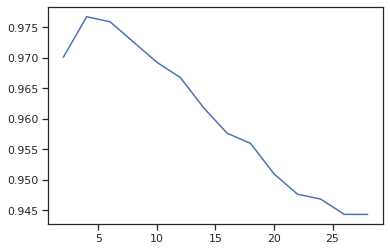

In [0]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [0]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

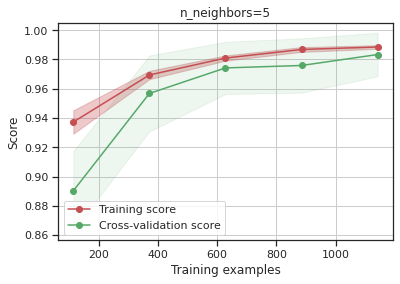

In [0]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=5), 'n_neighbors=5', 
                    mnist_X_train, mnist_y_train, cv=20)

###Построение кривой валидации

In [0]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

In [0]:
n_range2 = np.array(range(5,125,5))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

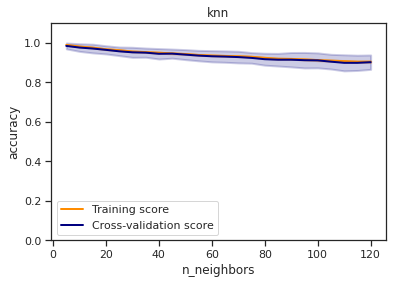

In [0]:
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      mnist_X_train, mnist_y_train, 
                      param_name='n_neighbors', param_range=n_range2, 
                      cv=20, scoring="accuracy")